In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/SahilSinhaLpu/Machine-Learning/master/Datasets/SomvervilleHappines.csv")
# D = decision attribute (D) with values 0 (unhappy) and 1 (happy)
# X1 = the availability of information about the city services
# X2 = the cost of housing
# X3 = the overall quality of public schools
# X4 = your trust in the local police
# X5 = the maintenance of streets and sidewalks
# X6 = the availability of social community events

In [4]:
df

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
138,0,5,3,3,1,3,5
139,1,5,2,3,4,2,5
140,1,5,3,3,4,4,5
141,0,4,3,3,4,4,5


In [9]:
# model construction
inp_df = df[['X1','X2','X3','X4','X5','X6']]
out_df = df[['D']]
X_train, X_test, y_train, y_test = train_test_split(inp_df, out_df, test_size=0.2, random_state=42)

In [12]:
y_tr_arr = np.asmatrix(y_train)
y_ts_arr = np.asmatrix(y_test)

In [13]:
y_train.head()
y_tr_arr = y_train.values
y_ts_arr = y_test.values

In [14]:
X_tr_arr = X_train
X_ts_arr = X_test

In [15]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (114, 6)
Output Shape (29, 6)


In [16]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost


def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred



In [17]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 6
Optimized weights [[ 0.03199291 -0.00886139  0.00498335 -0.01493544  0.02942359  0.02778697]]
Optimized intercept -0.00529364041154528
Training Accuracy 0.5526315789473685
Test Accuracy 0.4827586206896552


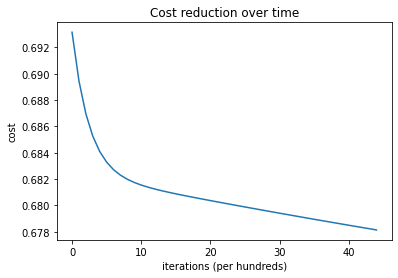

In [18]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [23]:
# now using ML libraries
from sklearn.linear_model import LogisticRegression
lorm = LogisticRegression()
lorm.fit(X_tr_arr, y_tr_arr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [24]:
print('co-efficien is ', lorm.coef_)
print('intercept is', lorm.intercept_)

co-efficien is  [[ 0.57767938 -0.02433481  0.01205983 -0.15193798  0.20848199  0.44618131]]
intercept is [-4.28765159]


In [27]:
pred = lorm.predict(X_ts_arr)
print ('Accuracy in test set {0}'.format(lorm.score(X_tr_arr, y_tr_arr)))
print ('Accuracy in train set{0}'.format(lorm.score(X_ts_arr, y_ts_arr)))

Accuracy in test set 0.6140350877192983
Accuracy in train set0.5517241379310345
